In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as math
import pandas as pd
import scipy.stats as stats
from hyppo.ksample import MMD

Критерий вида $d(P, Q) = sup_{f\in B_1}(E_H(f(x)-E_Pf(x)) +  sup_{f\in B_1}(E_H(f(x)-E_Qf(x))$, где $H = \frac{n}{n+m}P+\frac{m}{m+n}Q$

Статистика: $T = mmd^2(X_i, Y_j) + mmd^2(X_i, Z_j)$, где X - объединенная выборка Y и Z

In [17]:
def perm_pv(Y, Z, perm_num):
    X = np.concatenate((Y, Z), axis= 0)
    st = MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1)))
    i = 0
    for _ in range(perm_num):
        X = np.random.permutation(X)
        Y = X[:len(Y)]
        Z = X[len(Y):]
        st_new = MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1)))
        if st >= st_new:
            i += 1
    return i/perm_num

def mmd_stat(a1, a2):
   return np.sum(rbf_kernel(a1, a1))/(len(a1) * (len(a1)-1)) + np.sum(rbf_kernel(a2, a2))/(len(a2) * (len(a2)-1)) - 2 * np.sum(rbf_kernel(a1, a2))/(len(a1) * len(a2))

In [23]:
num = [i * 50 for i in range(1, 3)]
N = 50

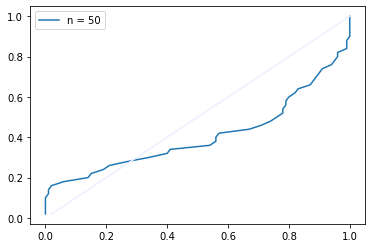

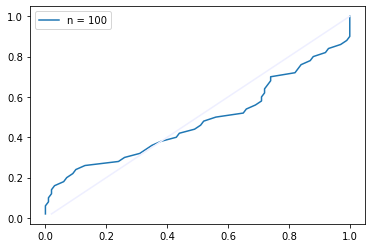

In [24]:
for n in num:
    p_value = []
    for i in range(N):
        Y = stats.norm(3, 2).rvs(n)
        Z = stats.norm(0, 1).rvs(n)
        p_value.append(1 - perm_pv(Y, Z, 100))
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = 'n = ' + str(n))
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()

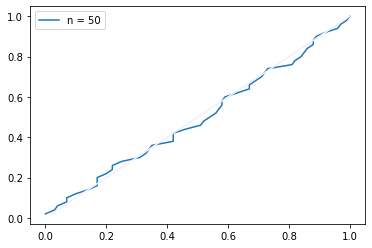

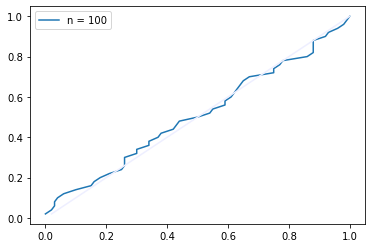

In [25]:
for n in num:
    p_value = []
    for i in range(N):
        Y = stats.norm(0.1, 1).rvs(n)
        Z = stats.norm(0, 1).rvs(n)
        p_value.append(1 - perm_pv(Y, Z, 100))
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = 'n = ' + str(n))
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()

n = 50


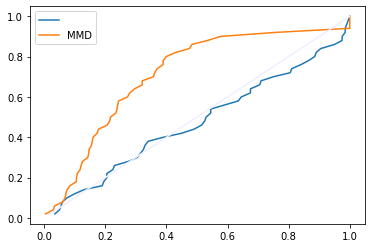

n = 100


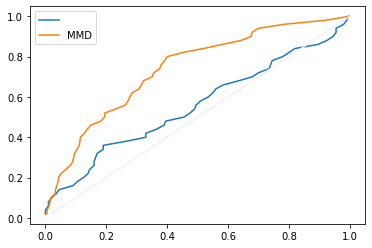

In [36]:
for n in num:
    print('n = '+str(n))
    p_value = []
    mmd_pv = []
    for i in range(N):
        Y = stats.norm(loc=0, scale=np.sqrt(2)).rvs(n)
        Z = stats.laplace.rvs(size = n)
        mmd_pv.append(MMD().test(Y, Z)[1])
        p_value.append(1 - perm_pv(Y, Z, 200))
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = ' ')
    plt.plot(sorted(mmd_pv), [(i + 1) / N for i in range(N)], label = 'MMD')
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()

Для k выборок: Возьмем попарную сумму для каждого P_i с H

In [39]:
def perm_pv_3(Y, Z, W, perm_num):
    X = np.concatenate((Y, Z, W), axis= 0)
    st = MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), W.reshape((W.shape[0], 1)))
    i = 0
    for _ in range(perm_num):
        X = np.random.permutation(X)
        Y = X[:len(Y)]
        Z = X[len(Y):len(Z)]
        W = X[len(Z):]
        st_new = MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), Z.reshape((Z.shape[0], 1))) + MMD().statistic(X.reshape((X.shape[0], 1)), W.reshape((W.shape[0], 1)))
        if st >= st_new:
            i += 1
    return i/perm_num


n = 50


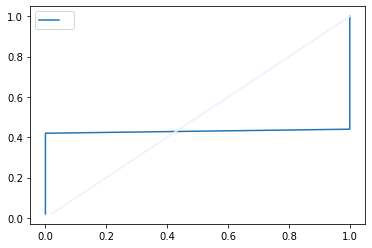

n = 100


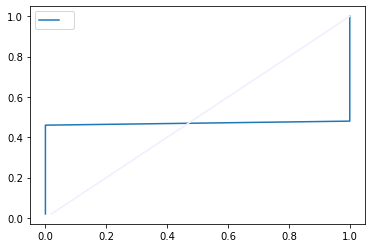

In [41]:
for n in num:
    print('n = '+str(n))
    p_value = []
    mmd_pv = []
    for i in range(N):
        Y = stats.expon.rvs(size=n)
        Z = stats.expon.rvs(size=n)
        W = stats.expon.rvs(scale=1/1.2, size=n)
        p_value.append(1 -perm_pv_3(Y, Z, W, 300))
    plt.plot(sorted(p_value), [(i + 1) / N for i in range(N)], label = ' ')
    plt.legend()
    plt.plot([(i + 1) / N for i in range(N)], [(i + 1) / N for i in range(N)], color = '#eeefff')
    plt.show()